.
.
.
.
.
part of main program
.
.
.
.
.

In [2]:
# some import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import os

/home/oleg/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# reading of data

df = pd.read_excel(
                "data/data.xlsx", 
                sheet_name="Лист1"
              )

# df.loc[len(df.index)] = df.mean(axis=0)
df["nF"] +=1
df["T"] = df["ms"]/df["n"]
df

,nF,ms,n,T
0,1,1.102,17,0.064824
1,2,1.176,13,0.090462
2,3,1.206,11,0.109636
3,4,1.146,9,0.127333
4,5,1.136,8,0.142000
5,6,1.088,7,0.155429
6,7,1.006,6,0.167667
7,8,1.074,6,0.179000
8,9,1.134,6,0.189000
9,10,1.012,5,0.202400


In [5]:
df = pd.read_excel(
                "./petya/main.xlsx", 
                sheet_name="Лист1"
              )

# df.loc[len(df.index)] = df.mean(axis=0)
df


,"с+с0, мкФ","Ттеор, с","Ттеор, мкс",Unnamed: 3,"t, мс","n, раз","Tпракт, мс","Tпракт, мкс",Unnamed: 8,"R, Ом","Rсумм, Ом","Rсумм^2, Ом^2","1/Rсумм^2, 1/Ом^2",О,О^2,1/О^2,Unnamed: 16,"Q, добротность",Unnamed: 18
0,0.001,0.000063,62.800000,NaN,1.102,17,0.064824,64.823529,NaN,300,335,112225,8.910671e-06,0.300245,0.090147,11.092985,NaN,10.458126,min O
1,0.002,0.000089,88.812612,NaN,1.176,13,0.090462,90.461538,NaN,408,443,196249,5.095567e-06,0.295786,0.087489,11.429962,NaN,10.615783,NaN
2,0.003,0.000109,108.772791,NaN,1.206,11,0.109636,109.636364,NaN,600,635,403225,2.480005e-06,0.529064,0.279909,3.572593,NaN,5.935010,NaN
3,0.004,0.000126,125.600000,NaN,1.146,9,0.127333,127.333333,NaN,800,835,697225,1.434257e-06,0.693147,0.480453,2.081370,NaN,4.530064,NaN
4,0.005,0.000140,140.425069,NaN,1.136,8,0.142000,142.000000,NaN,1000,1035,1071225,9.335107e-07,0.873794,0.763516,1.309730,NaN,3.593524,NaN
5,0.006,0.000154,153.827956,NaN,1.088,7,0.155429,155.428571,NaN,1200,1235,1525225,6.556410e-07,1.039720,1.081018,0.925054,NaN,3.020044,NaN
6,0.007,0.000166,166.153182,NaN,1.006,6,0.167667,167.666667,NaN,1500,1535,2356225,4.244077e-07,1.325260,1.756314,0.569374,NaN,2.369346,max O


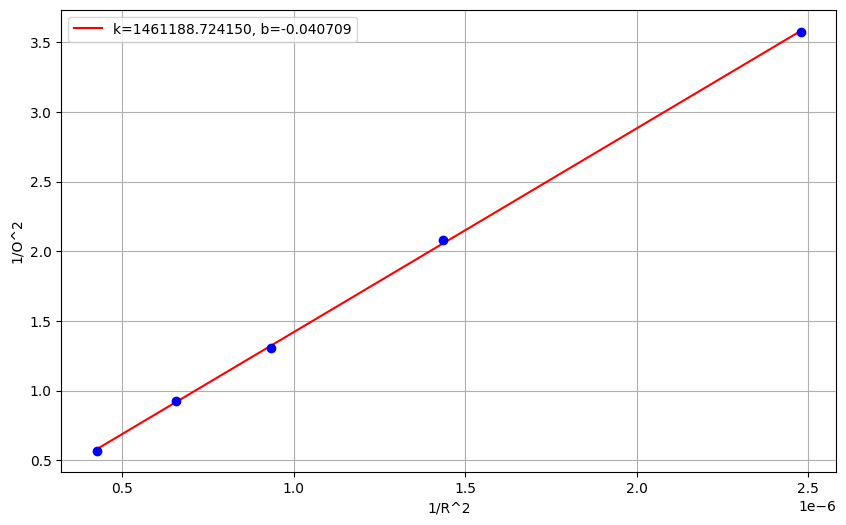

2063261241180.5242


In [6]:
# data analise

# y=df['nF'].tolist()
# x=df['T'].tolist()

# x=df['R'].tolist()
# y=df['teta'].tolist()

y=df['1/О^2'].tolist()
x=df['1/Rсумм^2, 1/Ом^2'].tolist()
y.pop(0)
y.pop(0)
x.pop(0)
x.pop(0)
plt.figure(figsize=(10,6))
# plt.title('Зависимость teta от R')
# plt.title('Зависимость периода от емкости (обратная)')
# plt.xlabel('R, Ом')
# plt.ylabel('teta')
plt.ylabel('1/O^2')
plt.xlabel('1/R^2')
plt.grid()
plt.errorbar(x, y, yerr=0, xerr=0, fmt='ob')
p=np.polyfit(x, y, 1)
# p = [p[0]+0.01, p[1]]
xx=np.linspace(min(x), max(x), 100)
yy=np.polyval(p, xx)
plt.plot(xx, yy, '-r', label=f'k={p[0]:.6f}, b={p[1]:.6f}')
plt.legend()
plt.show()
# gl1 = f'k={1/p[0]:.6f}'
# print(gl1)
# print(p)
print(sum([i**2 for i in y])/sum([i**2 for i in x]))

.
.
.
.
.
part of LaTex
.
.
.
.
.

In [8]:
# tables from  exel to LaTex



titles = []

# for column in titles:
#     data = df.to_latex
data = df.to_latex(index=False)
print(data)

\begin{tabular}{rr}
\toprule
R & teta \\
\midrule
400 & 0.296000 \\
800 & 0.693000 \\
1200 & 1.040000 \\
1600 & 1.407000 \\
2000 & 1.727000 \\
1800 & 1.595000 \\
1500 & 1.325000 \\
1000 & 0.874000 \\
600 & 0.529000 \\
300 & 0.300000 \\
\bottomrule
\end{tabular}

